In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
#step 1:Check missing values
data=pd.read_csv('data.csv')



In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Number of Missing Values in data

In [4]:
data_Missing=data.isnull().sum()

In [5]:
data_Missing

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Imputing Missing Values

In [6]:
Gender_data_count=data['Gender'].value_counts()

In [7]:
Gender_data_count

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
data['Gender'].fillna('Male',inplace=True)

In [9]:
data['Gender'].isnull().sum()

0

In [10]:
Married_data_count=data['Married'].value_counts()

In [11]:
Married_data_count

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
data['Married'].fillna('Yes',inplace=True)

In [13]:
data['Married'].isnull().sum()

0

In [14]:
Self_Emp_count=data['Self_Employed'].value_counts()

In [15]:
Self_Emp_count

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
data['Self_Employed'].fillna('No',inplace=True)

In [17]:
data['Self_Employed'].isnull().sum()

0

In [18]:
Dependent_counts=data['Dependents'].value_counts()

In [19]:
Dependent_counts

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [20]:
data['Dependents'].fillna('0',inplace=True)

In [21]:
Dependent_counts=data['Dependents'].value_counts()

In [22]:
Dependent_counts

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
data['Dependents'].isnull().sum()

0

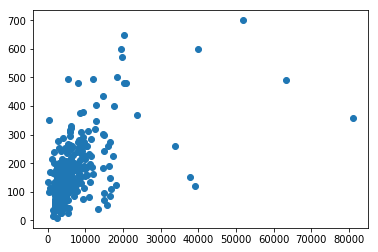

In [24]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])

In [25]:
data['LoanAmount'].fillna(data.LoanAmount.mean(),inplace=True)

In [26]:
data['LoanAmount'].isnull().sum()

0

In [27]:
data.Loan_Amount_Term.dtype

dtype('float64')

In [28]:
data.Loan_Amount_Term.head()

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64

In [29]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
data['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [31]:
data['Loan_Amount_Term'].isnull().any()

False

In [32]:
data.Credit_History.dtype

dtype('float64')

In [33]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [34]:
data['Credit_History'].fillna(1.0,inplace=True)

In [35]:
data.Credit_History.isnull().any()

False

In [36]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

This null of Loan_Status are from test set so this are not filled

In [37]:
bin_size=np.sqrt(len(data))

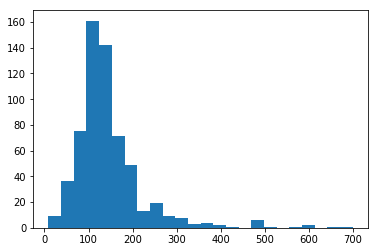

In [38]:
plt.hist(data['LoanAmount'],bins= int(bin_size))
plt.show()

In [39]:
print(data.LoanAmount.mean())
print(data.LoanAmount.median())
print(data.LoanAmount.mode())


146.41216216216213
129.0
0    146.412162
dtype: float64


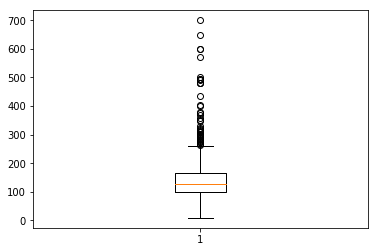

In [40]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [41]:
data['log_LoanAmount']=np.log(data['LoanAmount'])

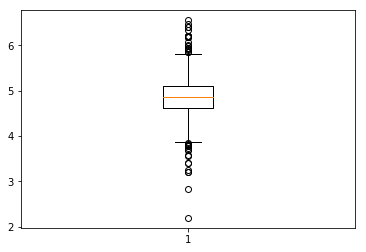

In [42]:
plt.boxplot(data['log_LoanAmount'])
plt.show()

In [43]:
print(data.log_LoanAmount.mean())
print(data.log_LoanAmount.median())


4.862065665493133
4.859812404361672


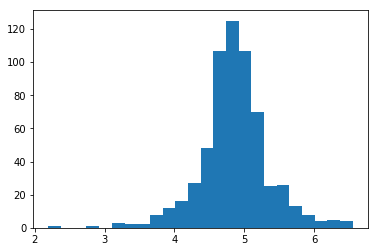

In [44]:
plt.hist(data['log_LoanAmount'],bins= int(bin_size))
plt.show()

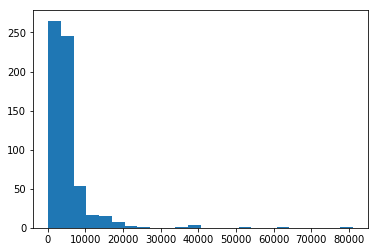

In [45]:
plt.hist(data['ApplicantIncome'],bins= int(bin_size))
plt.show()

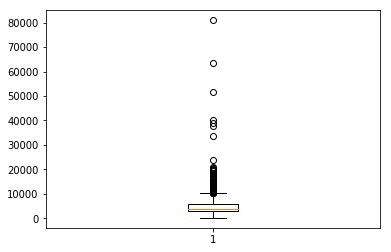

In [46]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

In [47]:
data['log_ApplicantIncome']=np.log(data['ApplicantIncome']+10)

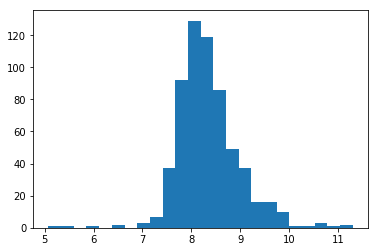

In [48]:
plt.hist(data['log_ApplicantIncome'],bins= int(bin_size))
plt.show()

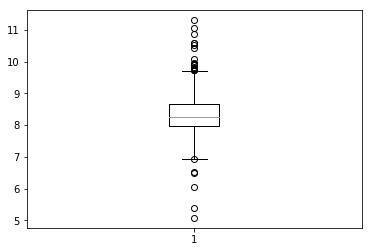

In [49]:
plt.boxplot(data['log_ApplicantIncome'])
plt.show()

In [50]:
print(data.log_LoanAmount.mean())
print(data.log_LoanAmount.median())


4.862065665493133
4.859812404361672


In [51]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

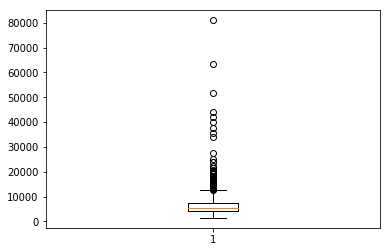

In [52]:
plt.boxplot(data['TotalIncome'])
plt.show()

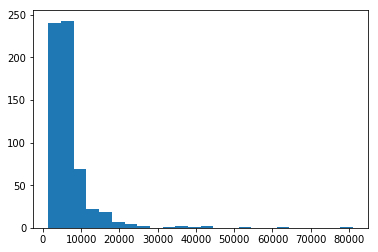

In [53]:
plt.hist(data['TotalIncome'],bins= int(bin_size))
plt.show()

In [54]:
data['log_TotalIncome']=np.log(data['TotalIncome'])

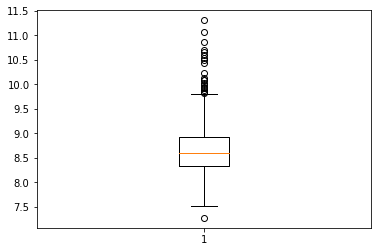

In [55]:
plt.boxplot(data['log_TotalIncome'])
plt.show()

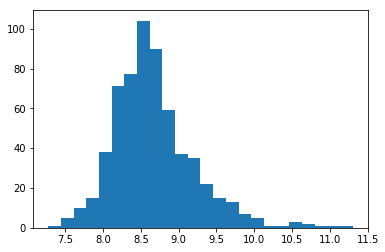

In [56]:
plt.hist(data['log_TotalIncome'],bins= int(bin_size))
plt.show()

In [57]:
print(data.log_TotalIncome.mean())
print(data.log_TotalIncome.median())


8.669413562902252
8.597205125125004


In [58]:
data['LoanAmountToTotalIncome']=data['LoanAmount']/data['TotalIncome']

In [59]:
data['LoanAmountToAppIncome']=data['ApplicantIncome']/data['LoanAmount']

In [60]:
data['LoanAmountToTotalIncome']=data['LoanAmountToTotalIncome'].astype(float)  
data['LoanAmountToAppIncome']=data['LoanAmountToAppIncome'].astype(float)
data['log_TotalIncome']=data['log_TotalIncome'].astype(float)
data['log_ApplicantIncome']=data['log_ApplicantIncome'].astype(float)
data['log_LoanAmount']=data['log_LoanAmount'].astype(float)

In [61]:
data.LoanAmountToAppIncome.min()

1.1111111111111112

In [62]:
data.LoanAmountToTotalIncome.min()

0.0025229164914641325

In [63]:
data.Loan_ID.dtype

dtype('O')

In [64]:
var_mod = ['Self_Employed','Property_Area','Married','Gender','Education','Dependents']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [65]:
data['Loan_ID'] = data['Loan_ID'].map(lambda x: str(x)[2:])
data.Loan_ID.dtype

dtype('O')

In [66]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,log_ApplicantIncome,TotalIncome,log_TotalIncome,LoanAmountToTotalIncome,LoanAmountToAppIncome
0,001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y,4.986426,8.675734,5849.0,8.674026,0.025032,39.948867
1,001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N,4.852030,8.432289,6091.0,8.714568,0.021015,35.804688
2,001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y,4.189655,8.009695,3000.0,8.006368,0.022000,45.454545
3,001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y,4.787492,7.860571,4941.0,8.505323,0.024287,21.525000
4,001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y,4.948760,8.701180,6000.0,8.699515,0.023500,42.553191


In [67]:
data.drop(['LoanAmount', 'CoapplicantIncome','ApplicantIncome'], axis=1, inplace=True)

In [68]:
X=data.loc[:, data.columns != 'Loan_Status']

In [69]:
y=data['Loan_Status']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=43)

In [71]:
Grad_model = GradientBoostingClassifier()

In [73]:
model=Grad_model.fit(X_train,y_train)

In [74]:
predicted=Grad_model.predict(X_test)

In [77]:
accuracy_score(y_test,predicted)

0.7804878048780488